In [2]:
# setup e test librerie
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


# Loading Datasets

In [3]:
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
dailyDistances = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyDistances_merged.csv")
dailySleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrateSeconds = pd.read_csv("Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [16]:
from functools import reduce 

# merge dei dataset
dfs = [dailyCalories, dailyIntensities, dailySteps, dailyDistances, dailySleep, weightLog]
dfs = [df.assign(Day=pd.to_datetime(df['Day'])) for df in dfs]

dailyActivities = reduce(lambda left,right: pd.merge(left,right,on=['Id', 'Day'], how='outer'), dfs)

# raffinamento dei dati
dailyActivities.set_index(['Id'], inplace=True)
dailyActivities['Day'] = pd.to_datetime(dailyActivities['Day'])
dailyActivities.fillna(dailyActivities.groupby('Id').transform(lambda x: x.mean()), inplace=True)
dailyActivities.head(5)

C:\Users\pnmat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == "":


,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,StepTotal
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,2307.507953,990.353128,193.025451,13.628844,21.239661,7652.188759
std,720.815522,301.262473,109.308468,20.000746,32.946264,5086.532832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1829.500000,729.000000,127.000000,0.000000,0.000000,3795.000000
50%,2140.000000,1057.000000,199.000000,7.000000,4.000000,7439.000000
75%,2796.500000,1229.000000,264.000000,19.000000,32.000000,10734.000000
max,4900.000000,1440.000000,518.000000,143.000000,210.000000,36019.000000


In [18]:
dailyAct2.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

## Data Visualization

<AxesSubplot:xlabel='StepTotal', ylabel='Calories'>

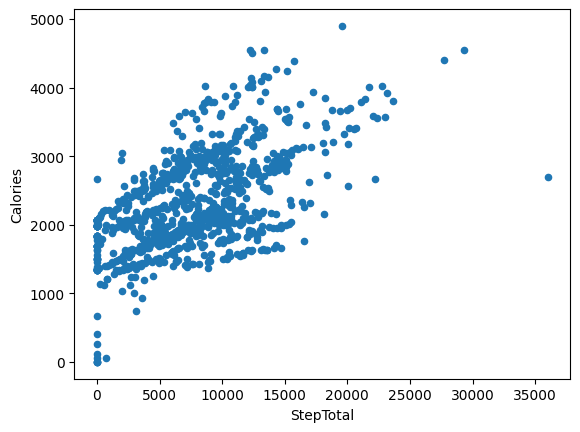

In [11]:
dailyActivities.plot.scatter(x='StepTotal', y='Calories')

<AxesSubplot:xlabel='Day', ylabel='TotalMinutesAsleep'>

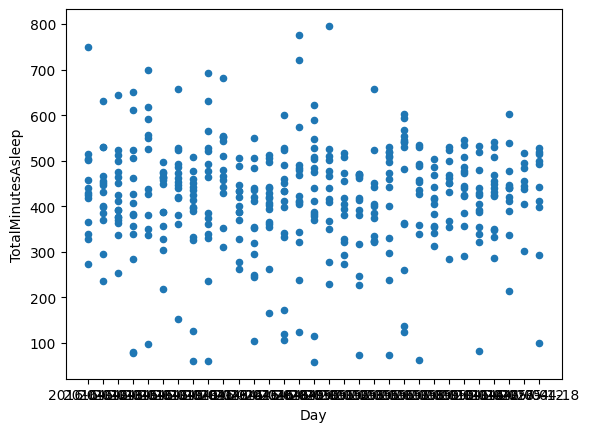

In [13]:
dailySleep.plot.scatter(x='Day', y='TotalMinutesAsleep')

<AxesSubplot:xlabel='TotalTimeInBed', ylabel='TotalMinutesAsleep'>

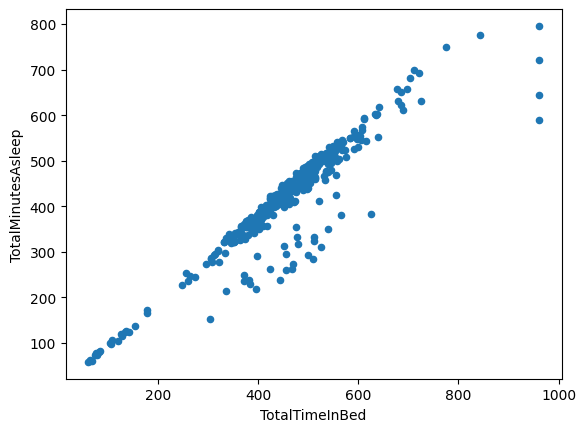

In [85]:
dailySleep.plot.scatter(x='TotalTimeInBed', y='TotalMinutesAsleep')

# Sleep Analysis


In [58]:
dailySleep["SleepClassification"] = "Buono"  # Imposta il valore predefinito a "Buono"
# Applica la regola per classificare il sonno come "cattivo" se TotalMinutesAsleep è inferiore al 50% di TotalTimeInBed
dailySleep.loc[dailySleep["TotalMinutesAsleep"] <  0.8* dailySleep["TotalTimeInBed"], "SleepClassification"] = "Cattivo"

In [59]:
from sklearn.model_selection import train_test_split
# Seleziona le colonne di input e l'etichetta di classe
#X = daily_data[["TotalSleepRecords", "TotalMinutesAsleep", "TotalTimeInBed"]]
X = dailySleep[["TotalMinutesAsleep", "TotalTimeInBed"]]
y = dailySleep['SleepClassification']
# Dividi il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


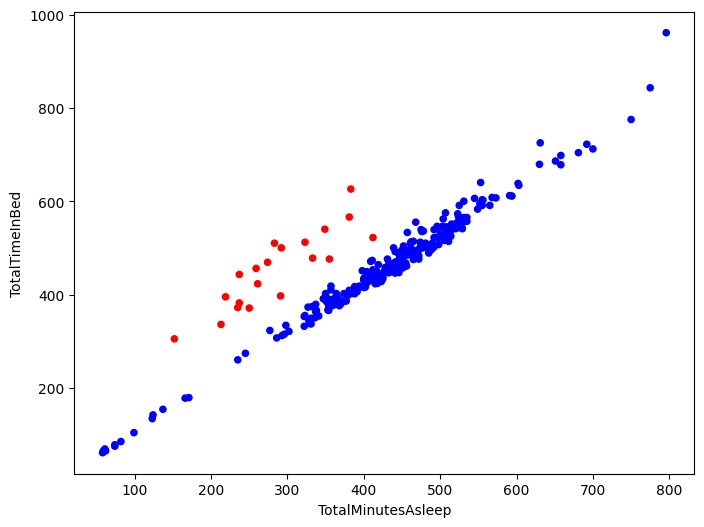

In [60]:
diagnosis_color_map = {"Buono": "blue", "Cattivo": "red"}
X_train.plot.scatter("TotalMinutesAsleep", "TotalTimeInBed", c=y_train.map(diagnosis_color_map), figsize=(8, 6));

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2dn_train = scaler.fit_transform(X_train)
X2dn_val = scaler.transform(X_test)

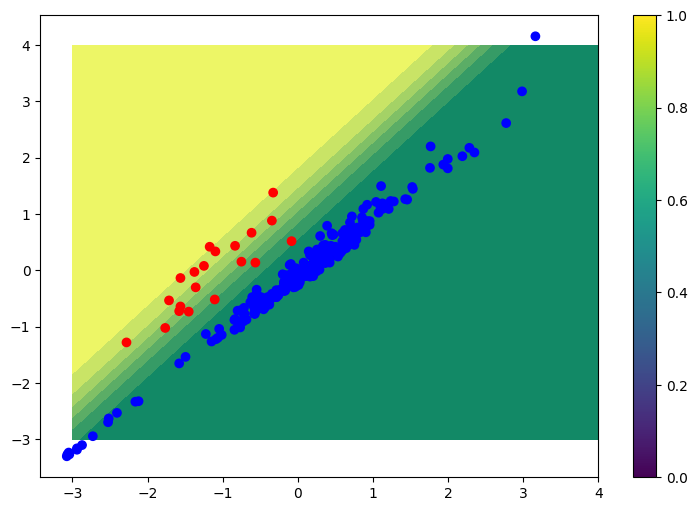

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="saga", random_state=42)
model.fit(X2dn_train, y_train)
mx1, mx2 = np.meshgrid(np.linspace(-3, 4, 100), np.linspace(-3, 4, 100))
my = model.predict_proba(np.c_[mx1.ravel(), mx2.ravel()])[:, 1].reshape(mx1.shape)
plt.figure(figsize=(9, 6))
plt.contourf(mx1, mx2, my, cmap="summer")
plt.scatter(*X2dn_train.T, c=y_train.map(diagnosis_color_map))
plt.colorbar();

In [63]:
model.score(X2dn_val, y_test)

0.9782608695652174